In [1]:
import requests
import pandas as pd
import time
import numpy as np

# Ubicaciones 

In [2]:
URL_ALL_SITES = "https://api.mercadolibre.com/sites" 

In [3]:
json_sites = requests.request(
    "GET",
    URL_ALL_SITES
).json()

In [4]:
json_sites

[{'default_currency_id': 'USD', 'id': 'MEC', 'name': 'Ecuador'},
 {'default_currency_id': 'MXN', 'id': 'MLM', 'name': 'Mexico'},
 {'default_currency_id': 'CUP', 'id': 'MCU', 'name': 'Cuba'},
 {'default_currency_id': 'GTQ', 'id': 'MGT', 'name': 'Guatemala'},
 {'default_currency_id': 'COP', 'id': 'MCO', 'name': 'Colombia'},
 {'default_currency_id': 'USD', 'id': 'MSV', 'name': 'El Salvador'},
 {'default_currency_id': 'CLP', 'id': 'MLC', 'name': 'Chile'},
 {'default_currency_id': 'CRC', 'id': 'MCR', 'name': 'Costa Rica'},
 {'default_currency_id': 'BRL', 'id': 'MLB', 'name': 'Brasil'},
 {'default_currency_id': 'BOB', 'id': 'MBO', 'name': 'Bolivia'},
 {'default_currency_id': 'PEN', 'id': 'MPE', 'name': 'Perú'},
 {'default_currency_id': 'PYG', 'id': 'MPY', 'name': 'Paraguay'},
 {'default_currency_id': 'NIO', 'id': 'MNI', 'name': 'Nicaragua'},
 {'default_currency_id': 'HNL', 'id': 'MHN', 'name': 'Honduras'},
 {'default_currency_id': 'DOP', 'id': 'MRD', 'name': 'Dominicana'},
 {'default_currenc

In [5]:
sites = [
    x["id"] for x in json_sites
]

sites

['MEC',
 'MLM',
 'MCU',
 'MGT',
 'MCO',
 'MSV',
 'MLC',
 'MCR',
 'MLB',
 'MBO',
 'MPE',
 'MPY',
 'MNI',
 'MHN',
 'MRD',
 'MPA',
 'MLU',
 'MLV',
 'MLA']

# Categorias por ubicacion 

In [6]:
URL_CAT_BY_SITE = "https://api.mercadolibre.com/sites/{site}/categories/all"

## Categorias Colombia (MCO)

In [7]:
json_MCO_categories = requests.request(
    "GET",
    URL_CAT_BY_SITE.format(
        site="MCO"
    )
).json()

In [8]:
cats_MCO = list(json_MCO_categories.keys())
print("[INFO]: Numero de categorias en Colombia:", len(cats_MCO))
cats_MCO[:10]

[INFO]: Numero de categorias en Colombia: 9704


['MCO6934',
 'MCO441917',
 'MCO1403',
 'MCO90072',
 'MCO403334',
 'MCO173787',
 'MCO442346',
 'MCO417547',
 'MCO1747',
 'MCO434708']

### Analisis de categoria

Listado de atributos por categoria

In [9]:
for x in json_MCO_categories[cats_MCO[0]].keys():
    print(x)

id
name
picture
permalink
total_items_in_this_category
path_from_root
children_categories
attribute_types
settings
channels_settings
meta_categ_id
attributable
date_created


In [10]:
json_MCO_categories[cats_MCO[0]]["total_items_in_this_category"]

274908

In [11]:
json_MCO_categories[cats_MCO[0]]["settings"].keys()

dict_keys(['adult_content', 'buying_allowed', 'buying_modes', 'catalog_domain', 'coverage_areas', 'currencies', 'fragile', 'immediate_payment', 'item_conditions', 'items_reviews_allowed', 'listing_allowed', 'max_description_length', 'max_pictures_per_item', 'max_pictures_per_item_var', 'max_sub_title_length', 'max_title_length', 'max_variations_allowed', 'maximum_price', 'maximum_price_currency', 'minimum_price', 'minimum_price_currency', 'mirror_category', 'mirror_master_category', 'mirror_slave_categories', 'price', 'reservation_allowed', 'restrictions', 'rounded_address', 'seller_contact', 'shipping_options', 'shipping_profile', 'show_contact_information', 'simple_shipping', 'stock', 'sub_vertical', 'subscribable', 'tags', 'vertical', 'vip_subdomain', 'buyer_protection_programs', 'status'])

In [12]:
json_MCO_categories["MCO6934"]

{'id': 'MCO6934',
 'name': 'Acc. para Carros y Camionetas',
 'picture': 'http://resources.mlstatic.com/category/images/2e4b7d67-a92d-4125-826e-2c8bda65613a.png',
 'permalink': None,
 'total_items_in_this_category': 274908,
 'path_from_root': [{'id': 'MCO1747', 'name': 'Accesorios para Vehículos'},
  {'id': 'MCO6934', 'name': 'Acc. para Carros y Camionetas'}],
 'children_categories': [{'id': 'MCO173787',
   'name': 'Accesorios de Exterior',
   'total_items_in_this_category': 95641},
  {'id': 'MCO173811',
   'name': 'Accesorios de Interior',
   'total_items_in_this_category': 120651},
  {'id': 'MCO87923', 'name': 'Otros', 'total_items_in_this_category': 58531}],
 'attribute_types': 'attributes',
 'settings': {'adult_content': False,
  'buying_allowed': True,
  'buying_modes': ['buy_it_now', 'auction'],
  'catalog_domain': 'MCO-LIGHT_VEHICLE_ACCESSORIES',
  'coverage_areas': 'not_allowed',
  'currencies': ['COP'],
  'fragile': False,
  'immediate_payment': 'required',
  'item_conditions':

## Categorias Relevantes

In [13]:
data_items = {
    "cod_category":[],
    "name_category":[],
    "total_items":[]
}

for cat in json_MCO_categories.keys():
    num_items = json_MCO_categories[cat]["total_items_in_this_category"]
    name = json_MCO_categories[cat]["name"]

    data_items["cod_category"].append(cat)
    data_items["name_category"].append(name)
    data_items["total_items"].append(num_items)

    
df_items = pd.DataFrame(
    data_items
)

df_items.sort_values(
    by=["total_items"],
    inplace=True,
    ascending=False
)

df_items.reset_index(
    inplace=True,
    drop=True
)

df_items["parti_num_items"] = 100* df_items["total_items"] / df_items["total_items"].sum()

df_items["cum_parti_num_items"] = df_items["parti_num_items"].cumsum()

df_items

,cod_category,name_category,total_items,parti_num_items,cum_parti_num_items
0,MCO1574,Hogar y Muebles,4305565,5.430839,5.430839
1,MCO1132,Juegos y Juguetes,2136362,2.694708,8.125547
2,MCO1246,Belleza y Cuidado Personal,2059954,2.598330,10.723877
3,MCO1747,Accesorios para Vehículos,1596663,2.013956,12.737833
4,MCO1430,Ropa y Accesorios,1431321,1.805402,14.543235
...,...,...,...,...,...
9699,MCO401906,Emuladores de Inyectores,0,0.000000,100.000000
9700,MCO417291,Otros,0,0.000000,100.000000
9701,MCO189233,Transfers para Gelatinas,0,0.000000,100.000000
9702,MCO263824,Panes de Miel,0,0.000000,100.000000


Seleccion de categorias con mayor participacion

In [14]:
118627

118627

In [15]:
over_80_perc = df_items[df_items["cum_parti_num_items"] > 80].index
df_items.drop(
    index=over_80_perc,
    inplace=True
)

df_items.head(20)

,cod_category,name_category,total_items,parti_num_items,cum_parti_num_items
0,MCO1574,Hogar y Muebles,4305565,5.430839,5.430839
1,MCO1132,Juegos y Juguetes,2136362,2.694708,8.125547
2,MCO1246,Belleza y Cuidado Personal,2059954,2.598330,10.723877
3,MCO1747,Accesorios para Vehículos,1596663,2.013956,12.737833
4,MCO1430,Ropa y Accesorios,1431321,1.805402,14.543235
5,MCO1592,Cocina,1260470,1.589898,16.133133
6,MCO3025,"Libros, Revistas y Comics",1088052,1.372418,17.505551
7,MCO1276,Deportes y Fitness,1063357,1.341269,18.846820
8,MCO1196,Libros Físicos,1016174,1.281755,20.128575
9,MCO1631,Adornos y Decoración del Hogar,860546,1.085453,21.214027


<AxesSubplot:>

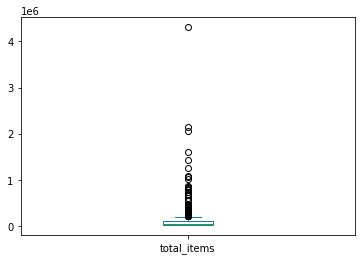

In [16]:
df_items["total_items"].plot(kind="box")

In [17]:
df_items["total_items"].describe()

count    5.080000e+02
mean     1.248268e+05
std      2.875454e+05
min      2.213100e+04
25%      3.095250e+04
50%      4.668950e+04
75%      1.015880e+05
max      4.305565e+06
Name: total_items, dtype: float64

In [18]:
cats_MCO = list(df_items.cod_category)

cats_MCO[:10]

['MCO1574',
 'MCO1132',
 'MCO1246',
 'MCO1747',
 'MCO1430',
 'MCO1592',
 'MCO3025',
 'MCO1276',
 'MCO1196',
 'MCO1631']

# Items por Categoria

Analisis de metodo GET para listado de items por categoria

In [19]:
URL_SPCF_CAT = "https://api.mercadolibre.com/sites/{site}/search?category={category}"

In [20]:
start = time.time()
json_items = requests.request(
    "GET",
    URL_SPCF_CAT.format(
        site="MCO",
        category="MCO1574"
    )
).json()
end = time.time()
lapso = end -start
print(lapso)

2.6373414993286133


In [21]:
len(json_items["results"])

39

In [22]:
pos = 0
sin_descuento = True
while sin_descuento&(pos < len(json_items["results"])):
    
    if json_items["results"][pos]["original_price"]:
        
        print("num_item", pos)
        print("item_id",json_items["results"][pos]["id"])
        print("original_price",json_items["results"][pos]["original_price"])
        sin_descuento = False
    
    pos = pos + 1

num_item 0
item_id MCO564288693
original_price 423150


In [23]:
items_descuentos = [x for x in json_items["results"] if x["original_price"]]
print("Numero de items con descuento:", len(items_descuentos))
print("Porcentaje de items con descuento:", 100*len(items_descuentos)/len(json_items["results"]))

Numero de items con descuento: 11
Porcentaje de items con descuento: 28.205128205128204


In [24]:
json_items.keys()

dict_keys(['site_id', 'country_default_time_zone', 'paging', 'results', 'sort', 'available_sorts', 'filters', 'available_filters'])

In [25]:
interesting_keys = [
    "paging",
    "sort",
    "available_sorts", 
    "filters",
    "available_filters"
]

for key in interesting_keys:
    print(key, json_items[key])
    print("\n")

paging {'total': 13788, 'primary_results': 1000, 'offset': 0, 'limit': 50}


sort {'id': 'relevance', 'name': 'Más relevantes'}


available_sorts [{'id': 'price_asc', 'name': 'Menor precio'}, {'id': 'price_desc', 'name': 'Mayor precio'}]


filters [{'id': 'category', 'name': 'Categorías', 'type': 'text', 'values': [{'id': 'MCO1574', 'name': 'Hogar y Muebles', 'path_from_root': [{'id': 'MCO1574', 'name': 'Hogar y Muebles'}]}]}]


available_filters [{'id': 'category', 'name': 'Categorías', 'type': 'text', 'values': [{'id': 'MCO436380', 'name': 'Muebles para el Hogar', 'results': 1625}, {'id': 'MCO1592', 'name': 'Cocina', 'results': 3306}, {'id': 'MCO165940', 'name': 'Jardin y Aire Libre', 'results': 2049}, {'id': 'MCO166256', 'name': 'Baños', 'results': 1543}, {'id': 'MCO1631', 'name': 'Adornos y Decoración del Hogar', 'results': 1483}, {'id': 'MCO436246', 'name': 'Textiles de Hogar y Decoración', 'results': 1319}, {'id': 'MCO181171', 'name': 'Cuidado del Hogar y Lavandería', 'results': 

In [26]:
for x in json_items["available_filters"]:
    print(x["id"], x["name"])

category Categorías
official_store Tiendas oficiales
state Ubicación
price Precio
accepts_mercadopago Filtro por MercadoPago
installments Pago
shipping Envío
power_seller Filtro por calidad de vendedores
has_video Filtro por publicaciones con video
has_pictures Filtro por publicaciones con imágenes
shipping_cost Costo de envío


## Items mas relevantes, con descuento

Luego de un analisis sobre filtros y ordenamientos se genera la siguiente ruta

In [27]:
URL_ITEMS_DISC = "https://api.mercadolibre.com/sites/{site}/search?category={category}&offset={offset}&sort=relevance&discount=5-100"

In [28]:
start = time.time()
json_items_disc = requests.request(
    "GET",
    URL_ITEMS_DISC.format(
        site="MCO",
        category="MCO1574",
        offset=0
    )
).json()
end = time.time()
lapso = end -start
print(lapso)

2.785458564758301


In [29]:
len(json_items_disc["results"])

50

In [30]:
pos = 0
sin_descuento = True
while sin_descuento&(pos < len(json_items_disc["results"])):
    
    if json_items_disc["results"][pos]["original_price"]:
        
        print("num_item", pos)
        print("item_id",json_items_disc["results"][pos]["id"])
        print("original_price",json_items_disc["results"][pos]["original_price"])
        sin_descuento = False
    
    pos = pos + 1

num_item 0
item_id MCO613095552
original_price 7162900


In [31]:
items_descuentos = [x for x in json_items_disc["results"] if x["original_price"]]
print("Numero de items con descuento:", len(items_descuentos))
print("Porcentaje de items con descuento:", 100*len(items_descuentos)/len(json_items["results"]))

Numero de items con descuento: 50
Porcentaje de items con descuento: 128.2051282051282


# Extraccion variables por Item

In [32]:
df_strc_json = pd.json_normalize(json_items_disc["results"][0])
df_strc_json.to_csv("estructura_json.csv")

df_strc_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 67 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    1 non-null      object 
 1   site_id                               1 non-null      object 
 2   title                                 1 non-null      object 
 3   price                                 1 non-null      int64  
 4   sale_price                            0 non-null      object 
 5   currency_id                           1 non-null      object 
 6   available_quantity                    1 non-null      int64  
 7   sold_quantity                         1 non-null      int64  
 8   buying_mode                           1 non-null      object 
 9   listing_type_id                       1 non-null      object 
 10  stop_time                             1 non-null      object 
 11  condition              

In [33]:
df_strc_json["tags"].values[0]

['good_quality_thumbnail',
 'loyalty_discount_eligible',
 'good_quality_picture',
 'immediate_payment']

In [34]:
df_strc_json.T.head(50)

,0
id,MCO613095552
site_id,MCO
title,Juego De Sala Para Exterior
price,4774900
sale_price,None
currency_id,COP
available_quantity,1
sold_quantity,0
buying_mode,buy_it_now
listing_type_id,gold_special


In [35]:
import json

In [36]:
dict_item_ejemplo = json_items_disc["results"][0]
item_ejemplo = open("item_ejemplo.json", "w")
item_ejemplo = json.dump(dict_item_ejemplo, item_ejemplo)

In [37]:
data_strc_json = {
    "id":[],
    "type":[],
    "value":[]
}
for x in dict_item_ejemplo.keys():
    
    data_strc_json["id"].append(x)
    data_strc_json["type"].append(type(dict_item_ejemplo[x]))
    data_strc_json["value"].append(dict_item_ejemplo[x])
    
df_strc_json = pd.DataFrame(
    data_strc_json,
    index=range(len(dict_item_ejemplo))
)

df_strc_json

,id,type,value
0,id,<class 'str'>,MCO613095552
1,site_id,<class 'str'>,MCO
2,title,<class 'str'>,Juego De Sala Para Exterior
3,seller,<class 'dict'>,"{'id': 686352448, 'permalink': None, 'registra..."
4,price,<class 'int'>,4774900
5,prices,<class 'dict'>,"{'id': 'MCO613095552', 'prices': [{'id': '12',..."
6,sale_price,<class 'NoneType'>,None
7,currency_id,<class 'str'>,COP
8,available_quantity,<class 'int'>,1
9,sold_quantity,<class 'int'>,0


In [38]:
df_strc_json["type"].unique()

array([<class 'str'>, <class 'dict'>, <class 'int'>, <class 'NoneType'>,
       <class 'bool'>, <class 'list'>], dtype=object)

In [39]:
df_strc_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      36 non-null     object
 1   type    36 non-null     object
 2   value   29 non-null     object
dtypes: object(3)
memory usage: 992.0+ bytes


In [40]:
complex_types = [
    dict,
    list
]

complex_keys = []

for row in df_strc_json[df_strc_json["type"].isin(complex_types)].iterrows():
    print(row[1]["id"]+"-"*10)
    print(row[1]["value"])
    print("\n")
    
    complex_keys.append(row[1]["id"])

seller----------
{'id': 686352448, 'permalink': None, 'registration_date': None, 'car_dealer': False, 'real_estate_agency': False, 'tags': None}


prices----------
{'id': 'MCO613095552', 'prices': [{'id': '12', 'type': 'standard', 'amount': 5866900, 'regular_amount': None, 'currency_id': 'COP', 'last_updated': '2021-04-08T00:38:52Z', 'conditions': {'context_restrictions': [], 'start_time': None, 'end_time': None, 'eligible': True}, 'exchange_rate_context': 'DEFAULT', 'metadata': {}}, {'id': '24', 'type': 'promotion', 'amount': 4774900, 'regular_amount': 7162900, 'currency_id': 'COP', 'last_updated': '2021-12-13T15:37:44Z', 'conditions': {'context_restrictions': ['channel_marketplace'], 'start_time': '2021-01-05T04:30:00Z', 'end_time': '2024-01-01T04:59:00Z', 'eligible': True}, 'exchange_rate_context': 'DEFAULT', 'metadata': {'campaign_id': 'MCO2298', 'promotion_id': 'MCO2298', 'promotion_type': 'campaign'}}], 'presentation': {'display_currency': 'COP'}, 'payment_method_prices': [], 're

In [41]:
complex_keys

['seller',
 'prices',
 'installments',
 'address',
 'shipping',
 'seller_address',
 'attributes',
 'tags']

# Funciones para extraer datos de un item

## Funcion auxiliar para extraer info de Json

In [42]:
def nested_get(key: str, obj: dict):
    """
    Funcion para acceder a valores en diccionarios anidados.
    :param key: String con las llaves a seguir hasta el valor separadas por
        puntos.
    :param obj: Diccionario.
    :return: Valor en Diccionario.
    """
    try:
        current = obj
        for k in key.split("."):
            current = current[k]
            
        return current
    except (KeyError, ValueError, TypeError):
        
        return None

## Extraccion de valores directos

In [43]:
simple_types = df_strc_json.loc[
    ~df_strc_json["type"].isin(complex_types),
    "id"
].unique()

simple_types

array(['id', 'site_id', 'title', 'price', 'sale_price', 'currency_id',
       'available_quantity', 'sold_quantity', 'buying_mode',
       'listing_type_id', 'stop_time', 'condition', 'permalink',
       'thumbnail', 'thumbnail_id', 'accepts_mercadopago',
       'original_price', 'category_id', 'official_store_id', 'domain_id',
       'catalog_product_id', 'order_backend', 'use_thumbnail_id',
       'offer_score', 'offer_share', 'match_score', 'winner_item_id',
       'melicoin'], dtype=object)

In [44]:
KEYS_DIRECT_VALUES=simple_types

In [45]:
def direct_values_extraction(obj: dict, list_keys=KEYS_DIRECT_VALUES):
    """
    Funcion para acceder a valores de llaves principales en el diccionario.
    :param list_keys: Lista de Strings con las llaves a seguir hasta el valor.
    :param obj: Diccionario.
    :return: DataFrame.
    """
    df = pd.DataFrame(
        columns=list_keys
    )
    
    for x in list_keys:
        value = nested_get(
            key=x, 
            obj=obj
        )
        
        df[x]=[value]
        
    return df

In [46]:
direct_values_extraction(
    obj=dict_item_ejemplo
)

,id,site_id,title,price,sale_price,currency_id,available_quantity,sold_quantity,buying_mode,listing_type_id,...,official_store_id,domain_id,catalog_product_id,order_backend,use_thumbnail_id,offer_score,offer_share,match_score,winner_item_id,melicoin
0,MCO613095552,MCO,Juego De Sala Para Exterior,4774900,None,COP,1,0,buy_it_now,gold_special,...,1471,MCO-LIVING_ROOM_SETS,None,1,False,None,None,None,None,None


## Extraccion de valores tipo Json o lista

In [47]:
complex_keys

['seller',
 'prices',
 'installments',
 'address',
 'shipping',
 'seller_address',
 'attributes',
 'tags']

In [48]:
for x in complex_keys:
    try:
        print('\"' + x + '\":[')
        for y in dict_item_ejemplo[x].keys():
            print('\"'+y+'\",')
        print('],')
    except:
        print(x)

"seller":[
"id",
"permalink",
"registration_date",
"car_dealer",
"real_estate_agency",
"tags",
],
"prices":[
"id",
"prices",
"presentation",
"payment_method_prices",
"reference_prices",
"purchase_discounts",
],
"installments":[
"quantity",
"amount",
"rate",
"currency_id",
],
"address":[
"state_id",
"state_name",
"city_id",
"city_name",
],
"shipping":[
"free_shipping",
"mode",
"tags",
"logistic_type",
"store_pick_up",
],
"seller_address":[
"id",
"comment",
"address_line",
"zip_code",
"country",
"state",
"city",
"latitude",
"longitude",
],
"attributes":[
attributes
"tags":[
tags


In [49]:
KEYS_JSON_TYPES = {
    "seller":[
        "id",
        "permalink",
        "registration_date",
        "car_dealer",
        "real_estate_agency",
        "tags",
    ],
    "prices":[
        "id",
        "prices",
        "presentation",
        "payment_method_prices",
        "reference_prices",
        "purchase_discounts",
    ],
    "installments":[
        "quantity",
        "amount",
        "rate",
        "currency_id",
    ],
    "address":[
        "state_id",
        "state_name",
        "city_id",
        "city_name",
    ],
    "shipping":[
        "free_shipping",
        "mode",
        "tags",
        "logistic_type",
        "store_pick_up",
    ],
    "seller_address":[
        "id",
        "comment",
        "address_line",
        "zip_code",
        "country",
        "state",
        "city",
        "latitude",
        "longitude",
    ]
}

KEYS_LIST_TYPES = [
    "attributes",
    "tags"
]

### Extraccion de Jsons subyacentes

In [50]:
def keys_large_construction(obj=KEYS_JSON_TYPES):
    
    keys_large = []
    
    for key in obj.keys():
        for value in obj[key]:
            keys_large.append(key+"."+value)

    return keys_large

In [51]:
KEYS_LARGE = keys_large_construction(KEYS_JSON_TYPES)

KEYS_LARGE

['seller.id',
 'seller.permalink',
 'seller.registration_date',
 'seller.car_dealer',
 'seller.real_estate_agency',
 'seller.tags',
 'prices.id',
 'prices.prices',
 'prices.presentation',
 'prices.payment_method_prices',
 'prices.reference_prices',
 'prices.purchase_discounts',
 'installments.quantity',
 'installments.amount',
 'installments.rate',
 'installments.currency_id',
 'address.state_id',
 'address.state_name',
 'address.city_id',
 'address.city_name',
 'shipping.free_shipping',
 'shipping.mode',
 'shipping.tags',
 'shipping.logistic_type',
 'shipping.store_pick_up',
 'seller_address.id',
 'seller_address.comment',
 'seller_address.address_line',
 'seller_address.zip_code',
 'seller_address.country',
 'seller_address.state',
 'seller_address.city',
 'seller_address.latitude',
 'seller_address.longitude']

In [52]:
def sub_json_extraction(obj:dict, list_keys=KEYS_LARGE):
    cols = [
        x.replace(".","_") for x in list_keys
    ]
    df = pd.DataFrame(
        columns=list_keys
    )
    
    for key in list_keys:
        value = nested_get(
            key=key, 
            obj=obj
        )
        df[key] = [value]
        
    df.columns = cols
        
    return df

In [53]:
df = sub_json_extraction(
    obj=dict_item_ejemplo,
    list_keys=keys_large_construction(KEYS_JSON_TYPES)
)

df

,seller_id,seller_permalink,seller_registration_date,seller_car_dealer,seller_real_estate_agency,seller_tags,prices_id,prices_prices,prices_presentation,prices_payment_method_prices,...,shipping_store_pick_up,seller_address_id,seller_address_comment,seller_address_address_line,seller_address_zip_code,seller_address_country,seller_address_state,seller_address_city,seller_address_latitude,seller_address_longitude
0,686352448,None,None,False,False,None,MCO613095552,"[{'id': '12', 'type': 'standard', 'amount': 58...",{'display_currency': 'COP'},[],...,False,,,,,"{'id': 'CO', 'name': 'Colombia'}","{'id': 'CO-VAC', 'name': 'Valle Del Cauca'}","{'id': 'TUNPQ1lVTTE2MGZm', 'name': 'Yumbo'}",,


### Extraccion de listas subyacentes

#### Analisis de listas

In [54]:
KEYS_LIST_TYPES

['attributes', 'tags']

##### Attributes 

In [55]:
dict_item_ejemplo["attributes"][1]

{'value_struct': None,
 'values': [{'id': '2230284',
   'name': 'Nuevo',
   'struct': None,
   'source': 6808261514773724}],
 'attribute_group_name': 'Otros',
 'value_name': 'Nuevo',
 'attribute_group_id': 'OTHERS',
 'source': 6808261514773724,
 'id': 'ITEM_CONDITION',
 'name': 'Condición del ítem',
 'value_id': '2230284'}

In [56]:
for x in json_items_disc["results"][1]["attributes"]:
    print(x["id"], x["value_name"])

BRAND portal del hogar
ITEM_CONDITION Nuevo
LENGTH None
MODEL afilador de cuchillos
PACKAGE_LENGTH 12 cm
PACKAGE_WEIGHT 240 g
UNITS_PER_PACKAGE 1


In [57]:
ATTRIBUTES_IDS = [
    "ITEM_CONDITION",
    "BRAND",
    "MODEL"
]

In [58]:
def attribute_extraction(obj:dict,  attributes_id=ATTRIBUTES_IDS):
    atts = obj["attributes"]
    data = {
        "NUM_ATTRIBUTEs":len(atts)
    }
    
    for x in atts:
        att_id = x["id"]
        value = None
        
        if att_id in attributes_id:
            
            data[att_id] = x["value_name"]
            
    df = pd.DataFrame(
        data=data,
        index=[0]
    )
    
    return df

In [59]:
attribute_extraction(
    attributes_id=ATTRIBUTES_IDS, 
    obj=dict_item_ejemplo
)

,NUM_ATTRIBUTEs,BRAND,ITEM_CONDITION,MODEL
0,3,RTA DESING,Nuevo,VMOD-102


##### Tags

In [60]:
dict_item_ejemplo["tags"]

['good_quality_thumbnail',
 'loyalty_discount_eligible',
 'good_quality_picture',
 'immediate_payment']

In [61]:
json_items_disc["results"][4]["tags"]

['good_quality_picture',
 'good_quality_thumbnail',
 'loyalty_discount_eligible',
 'immediate_payment']

In [62]:
TAGS = [
    "best_seller_candidate",
    "loyalty_discount_eligible",
    "good_quality_picture"
]

In [63]:
def tags_extraction(obj:dict, list_tags=TAGS):
    
    item_tags = obj["tags"]
    data = {
        "num_tags":len(item_tags)
    }
    
    for tag in list_tags:
        data[tag] = 1 if tag in item_tags else 0
        
    df = pd.DataFrame(
        data=data,
        index=[0]
    )
    
    return df  

In [64]:
tags_extraction(obj=dict_item_ejemplo)

,num_tags,best_seller_candidate,loyalty_discount_eligible,good_quality_picture
0,4,0,1,1


## Agrupacion de variable spor item

In [65]:
def info_item(
    obj_item:dict,
    list_direct_values=KEYS_DIRECT_VALUES,
    obj_keys_json_type=KEYS_JSON_TYPES,
    attributes_id=ATTRIBUTES_IDS,
    list_tags=TAGS
):
    """
    Funcion que retorna la informacion relevante por item, de acuerdo a los parametros.
    :param: json del item junto con especificaciones para cada funcion.
    :return: DataFrame.
    """
    keys_large_json=keys_large_construction(obj_keys_json_type)
    
    df = pd.concat(
        [
            direct_values_extraction(
                obj=obj_item, 
                list_keys=list_direct_values
            ),
            sub_json_extraction(
                obj=obj_item,
                list_keys=keys_large_json
            ),
            attribute_extraction(
                obj=obj_item,
                attributes_id=attributes_id
            ),
            tags_extraction(
                obj=obj_item, 
                list_tags=list_tags
            )
        ],
        axis=1
    )
    
    return df

In [66]:
def items_request(obj:dict):
    """
    Funcion que estructura una tabla con la informacion de items por consulta
    :param: Consulta API.
    :return: DataFrame.
    """

    df = pd.DataFrame()
    try:
        for x in obj["results"]:
            df_temp = info_item(obj_item=x)
            df = pd.concat(
                [
                    df_temp,
                    df
                ],
                axis=0
            ).reset_index(drop=True)
    except:
        print("[ERROR]: No se pudo crear tabla de items")
        
    return df

In [67]:
df_total = items_request(json_items_disc)

df_total.head(10)

,id,site_id,title,price,sale_price,currency_id,available_quantity,sold_quantity,buying_mode,listing_type_id,...,seller_address_latitude,seller_address_longitude,NUM_ATTRIBUTEs,BRAND,ITEM_CONDITION,MODEL,num_tags,best_seller_candidate,loyalty_discount_eligible,good_quality_picture
0,MCO588885852,MCO,Set X2 Tuppers Begônia Recipientes De Plástico...,21700,None,COP,50,250,buy_it_now,gold_special,...,,,5,Begônia,Nuevo,NF20070208-1,7,1,1,1
1,MCO602167001,MCO,Regadera Ducha Metálica 20 X 20 Cuadrada Kit T...,36955,None,COP,1,500,buy_it_now,gold_pro,...,,,5,General,Nuevo,DU-2,6,1,1,1
2,MCO605884969,MCO,Combo Mesa Cuadrada Y 4 Sillas Para Exterior N...,1550900,None,COP,50,0,buy_it_now,gold_special,...,,,3,RTA DESING,Nuevo,VMOD 116,4,0,1,1
3,MCO510586505,MCO,Kit 6 Sillas Eames Patas En Madera Para Comed...,549900,None,COP,1,250,buy_it_now,gold_special,...,,,4,Box Bit,Nuevo,OR-1102B,5,0,1,1
4,MCO598391564,MCO,Escritorio Axis Wengue,292900,None,COP,200,500,buy_it_now,gold_special,...,,,5,RTA DESING,Nuevo,ELW 1464,3,0,0,1
5,MCO563870938,MCO,Marcos Para Fotos Portaretrato Blancos X 7 Uni...,32500,None,COP,100,500,buy_it_now,gold_special,...,,,5,Begônia,Nuevo,D150919006,7,1,1,1
6,MCO846307372,MCO,Combo Sofacama Tapizado + Poltrona + Puff + Me...,2726400,None,COP,1,0,buy_it_now,gold_special,...,,,2,Alameda,Nuevo,NaN,4,0,1,1
7,MCO578138693,MCO,"Delantal Cocina Unicolor Antifluido Negro,blan...",13575,None,COP,500,500,buy_it_now,gold_pro,...,,,3,san laurent,Nuevo,delantal cocina,5,0,1,1
8,MCO598705891,MCO,Mueble Alacena Varese,316900,None,COP,500,250,buy_it_now,gold_special,...,,,3,Rta Design,Nuevo,MLB 1636,3,0,0,1
9,MCO487675871,MCO,Kit 4 Sillas Charles Eames Madera - Eiffel,379900,None,COP,1,500,buy_it_now,gold_special,...,,,4,Box Bit,Nuevo,OR-1102B,5,0,1,1


In [68]:
df_total.to_csv("prueba_50_items.csv", index=False)

In [69]:
URL_TEST = "https://api.mercadolibre.com/sites/{site}/search?category={category}&offset={offset}&sort=relevance&limit=50"

In [70]:
URL_SITE_CAT_OFFSET_DISC = """
https://api.mercadolibre.com/sites/{site}/search?category={category}&offset={offset}&sort=relevance&limit=50&discount=5-100
"""

URL_SITE_CAT_OFFSET = """
https://api.mercadolibre.com/sites/{site}/search?category={category}&offset={offset}&sort=relevance&limit=50
"""

In [71]:
def lote_items(
    category:str,
    site:str,
    size:int,
    file_name:str,
    discount:bool
):
    """
    Funcion que realiza sufientes consultas y las estructura para generar una tabla
        con un minimo de items
    :param: Detalles de consulta y numero de items.
    :return: DataFrame.
    """
    if discount:
        URL_TEMP = URL_SITE_CAT_OFFSET_DISC
    else:
        URL_TEMP = URL_SITE_CAT_OFFSET
        
    load = -1
    errores = 0
    while(load<size)&(errores<10):
        try:
            json_temp = requests.request(
                "GET",
                URL_TEMP.format(
                    site=site,
                    category=category,
                    offset=load+1
                )
            ).json()
                      
            df_temp = items_request(json_temp)
            
            if file_name in os.listdir():
                df_loaded_items = pd.read_csv(file_name)
            else:
                df_loaded_items = pd.DataFrame()
                
            df_loaded_items = pd.concat(
                [
                    df_temp,
                    df_loaded_items
                ],
                axis=0
            ).reset_index(drop=True)
            
            load = df_loaded_items.shape[0]
            df_loaded_items.to_csv(file_name,index=False)
            
        except(KeyError, ValueError, TypeError):
            print("[ERROR]: No se puedo cargar el volumen de datos.")
            time.sleep(3)
            errores = errores + 1
    print("[INFO]: Termino, revise la ruta "+file_name)

In [73]:
import os

In [74]:
lote_items(
    category="MCO1574",
    size=100, 
    site="MCO",
    file_name="prueba_100_items.csv",
    discount=True
)

[INFO]: Termino, revise la ruta prueba_100_items.csv


# PRUEBA utils, constants

In [75]:
import utils
import constants

In [76]:
import os

In [77]:
URL_ITEMS_DISC = "https://api.mercadolibre.com/sites/{site}/search?category={category}&offset={offset}&sort=relevance&discount=5-100"

start = time.time()
json_items_disc = requests.request(
    "GET",
    URL_ITEMS_DISC.format(
        site="MCO",
        category="MCO1574",
        offset=0
    )
).json()
end = time.time()
lapso = end -start
print(lapso)

1.2271876335144043


In [78]:
# json_items_disc["results"]

In [81]:
utils.lote_items(
    category="MCO1574",
    size=20, 
    site="MCO",
    file_name="prueba_20_items.csv",
    discount=True
)

[INFO]: Termino, revise la ruta prueba_20_items.csv
